In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lesson 9 (08/01/2025)

## Ensemble Learning

Ensemble learning is a supervised machine-learning technique that combines multiple models to build a more powerful and robust model. The idea is that by combining the strengths of multiple models, we can create a model that is more robust and less likely to overfit the data. It can be used for both classification and regression tasks.

Ensemble learning techniques can be categorized in three ways:
* Bagging (Bootstrap Aggregating)
* Boosting
* Stacking (Stacked Generalization)

## Random Forest Algorithm

Random forest is a commonly-used machine learning algorithm that combines the output of multiple decision trees to reach a single result.

Decision trees can be prone to problems, such as bias and overfitting. However, when multiple decision trees form an ensemble in the random forest algorithm, they predict more accurate results, particularly when the individual trees are uncorrelated with each other.

**Bagging** is an ensemble learning model, where multiple models are trained on different subsets of the training data. Each subset is sampled with replacement and prediction is made by averaging the prediction of the weak models for regression problem and considering majority vote for classification problem.

1. **Bagging** - sampling with rReplacement: for each tree in the forest, a random sample of the training data is taken with replacement. This means that some instances may be repeated while others may not be included at all.
Because each tree is trained on a different subset of the data, the trees can learn different patterns, which contributes to the overall robustness of the model.
2. **Random Feature Selection** - when splitting a node in each tree, a random subset of features is selected instead of considering all available features. This is typically controlled by a parameter called **max_features**.
This random selection of features ensures that the trees are less correlated with one another, which reduces overfitting and increases the generalization ability of the ensemble.
3. Depending on the type of problem, the determination of the prediction will vary. For a regression task, the individual decision trees will be averaged, and for a classification task, a **majority vote** — i.e. the most frequent categorical variable—will yield the predicted class.

### Data Preparation

In [50]:
from google.colab import files
uploaded = files.upload()

Saving heart_small.csv to heart_small.csv


In [51]:
data = pd.read_csv('/content/heart_small.csv')
data

age  sex   BP  cholestrol  heart disease
0     70    1  130         322              1
1     67    0  115         564              0
2     57    1  124         261              1
3     64    1  128         263              0
4     74    0  120         269              0
..   ...  ...  ...         ...            ...
265   52    1  172         199              0
266   44    1  120         263              0
267   56    0  140         294              0
268   57    1  140         192              0
269   67    1  160         286              1

[270 rows x 5 columns]

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [53]:
data.isna().sum()

age              0
sex              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

In [55]:
data['heart disease'].value_counts(normalize=True)

heart disease
0    0.555556
1    0.444444
Name: proportion, dtype: float64

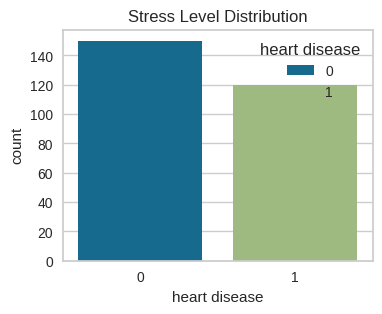

In [56]:
plt.figure(figsize=(4,3))
sns.countplot(x= "heart disease", data= data, hue="heart disease")
plt.title('Stress Level Distribution')
plt.show()

In [57]:
columns=data.columns
columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [58]:
firsts=columns[0:4]
firsts

Index(['age', 'sex', 'BP', 'cholestrol'], dtype='object')

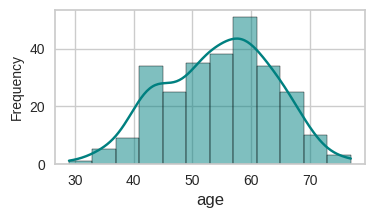

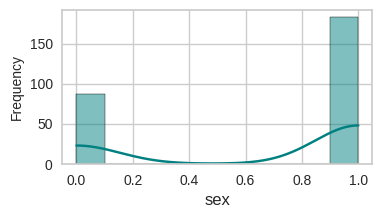

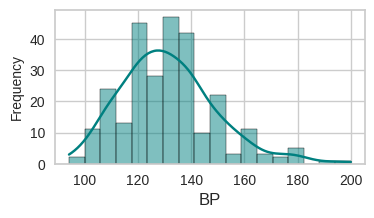

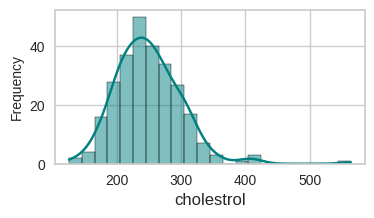

In [59]:
for col in firsts:
    plt.figure(figsize=(4, 2))
    sns.histplot(data[col], kde=True, color='teal')
    #plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=10)
    plt.show()

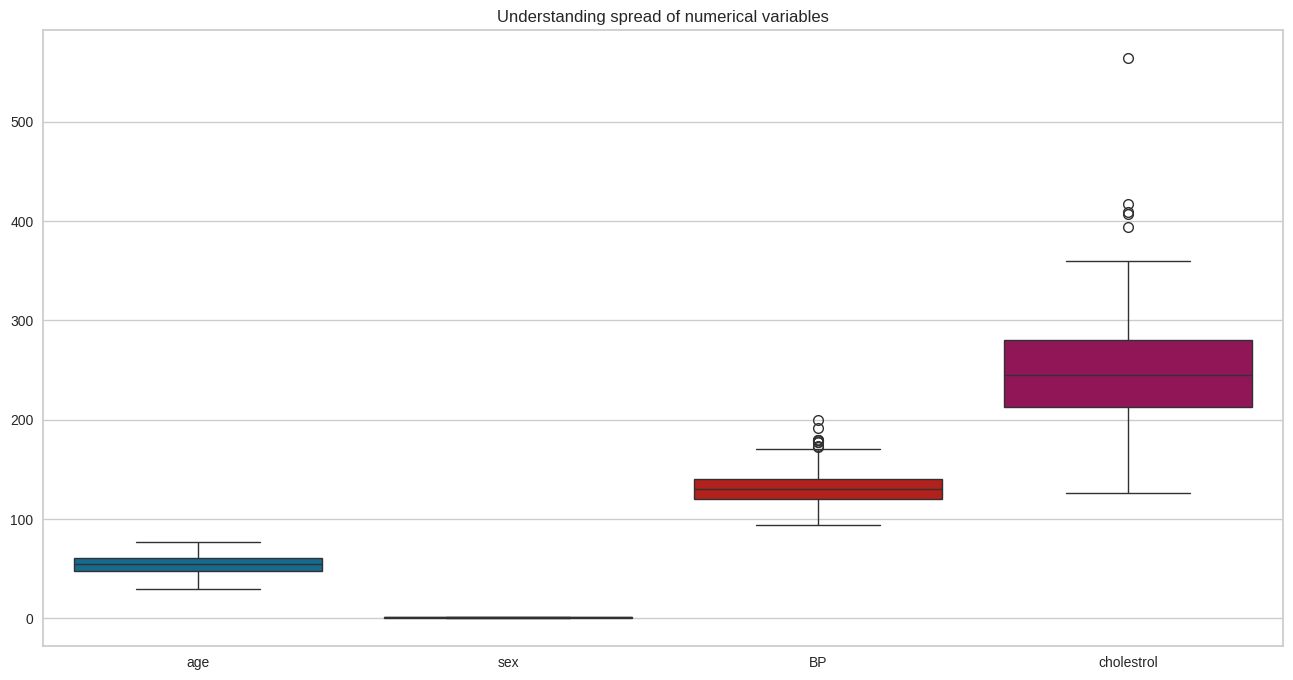

In [60]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data[firsts])
plt.title("Understanding spread of numerical variables")

plt.show()

When correlation between two variables is too close to 1 means that the variables are very dependent of each other

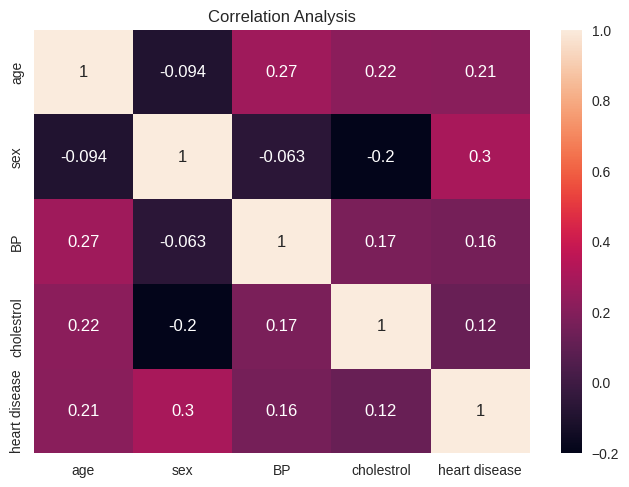

In [61]:
sns.heatmap(data.corr(), annot=True)
plt.title("Correlation Analysis")
plt.show()

In [62]:
from sklearn.model_selection import train_test_split
X = data.drop('heart disease', axis=1)
y = data['heart disease']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y,random_state=1)

In [63]:
y_train.value_counts(normalize=True)

heart disease
0    0.555556
1    0.444444
Name: proportion, dtype: float64

### First Model

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
# Create a Random Forest Classifier
rf_model_01 = RandomForestClassifier(n_estimators=10, random_state=42)

In [66]:
# Train the classifier
rf_model_01.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_model_01.predict(X_test)

#### Tree Plot

Random forest works on several decision tree. Plotting them gives a hunch basically how a model predicts the value of a target variable by learning simple decision rules inferred from the data features.

Considering majority voting concept in random forest, we usually prefer more no of trees (even up to 200) to build random forest, hence it is almost impracticable to conceive all the decision trees. But visualizing any 2-3 trees picked randomly will gives fairly a good intuition of model learning.

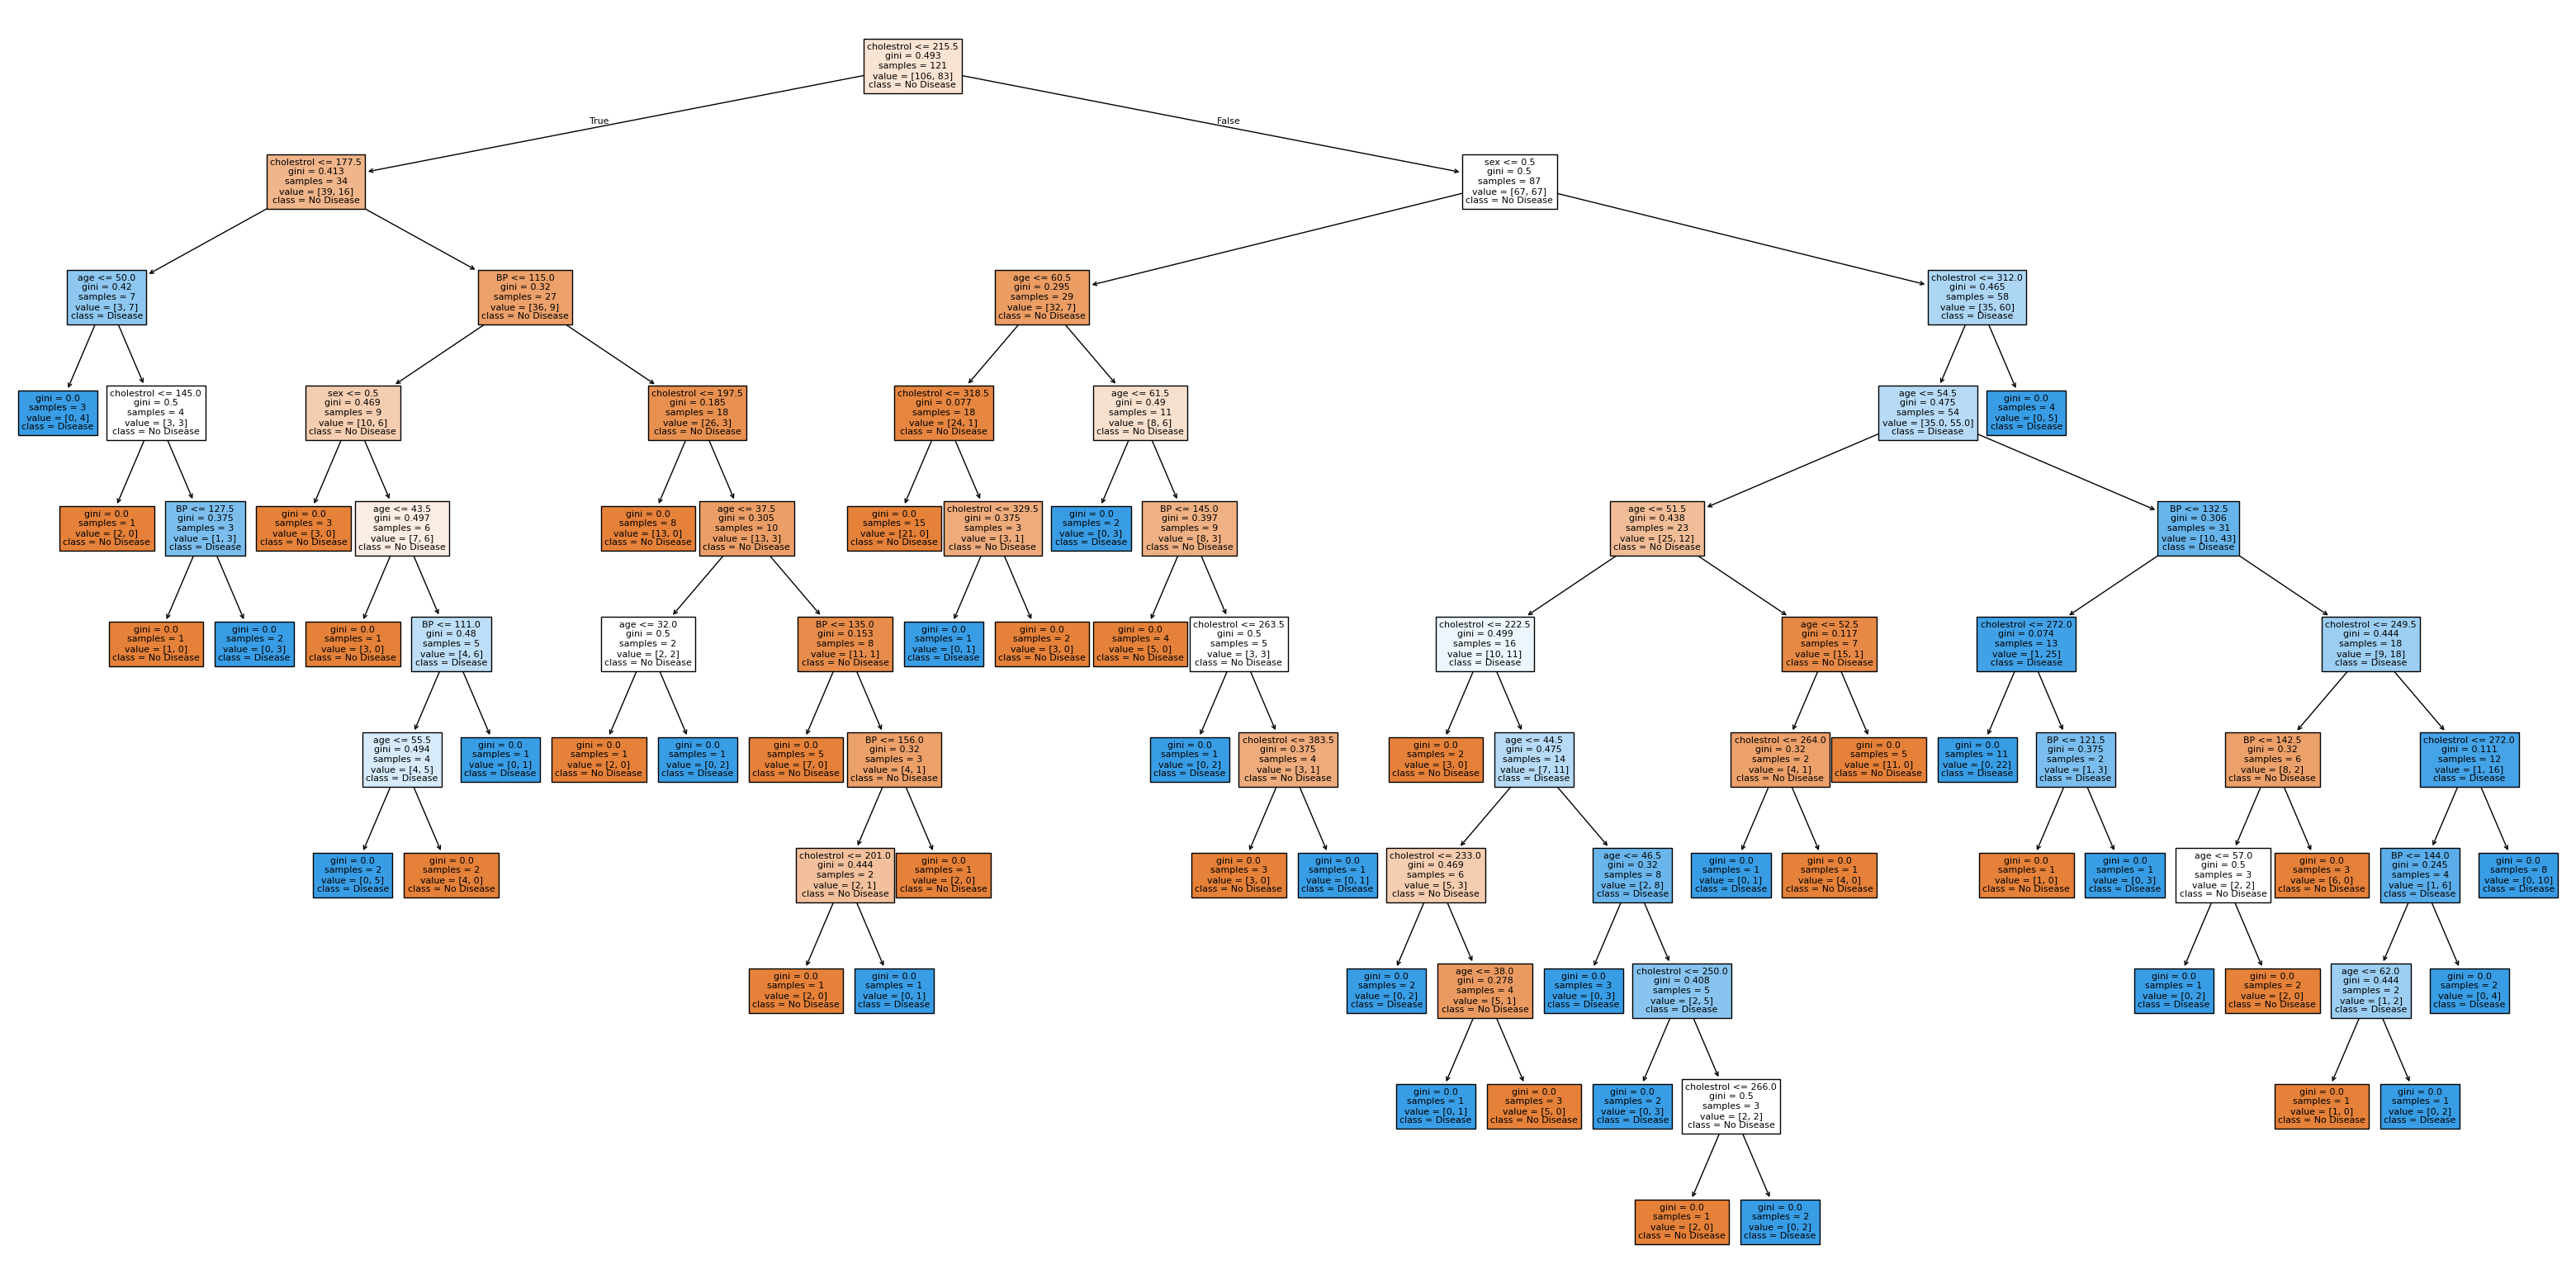

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40,20))
plot_tree(rf_model_01.estimators_[1], feature_names = X.columns,class_names=["No Disease",'Disease'],filled=True);

In the following cell we observe there aren't two equal trees, because we use different estimators (which can be equivalent to different training sets)

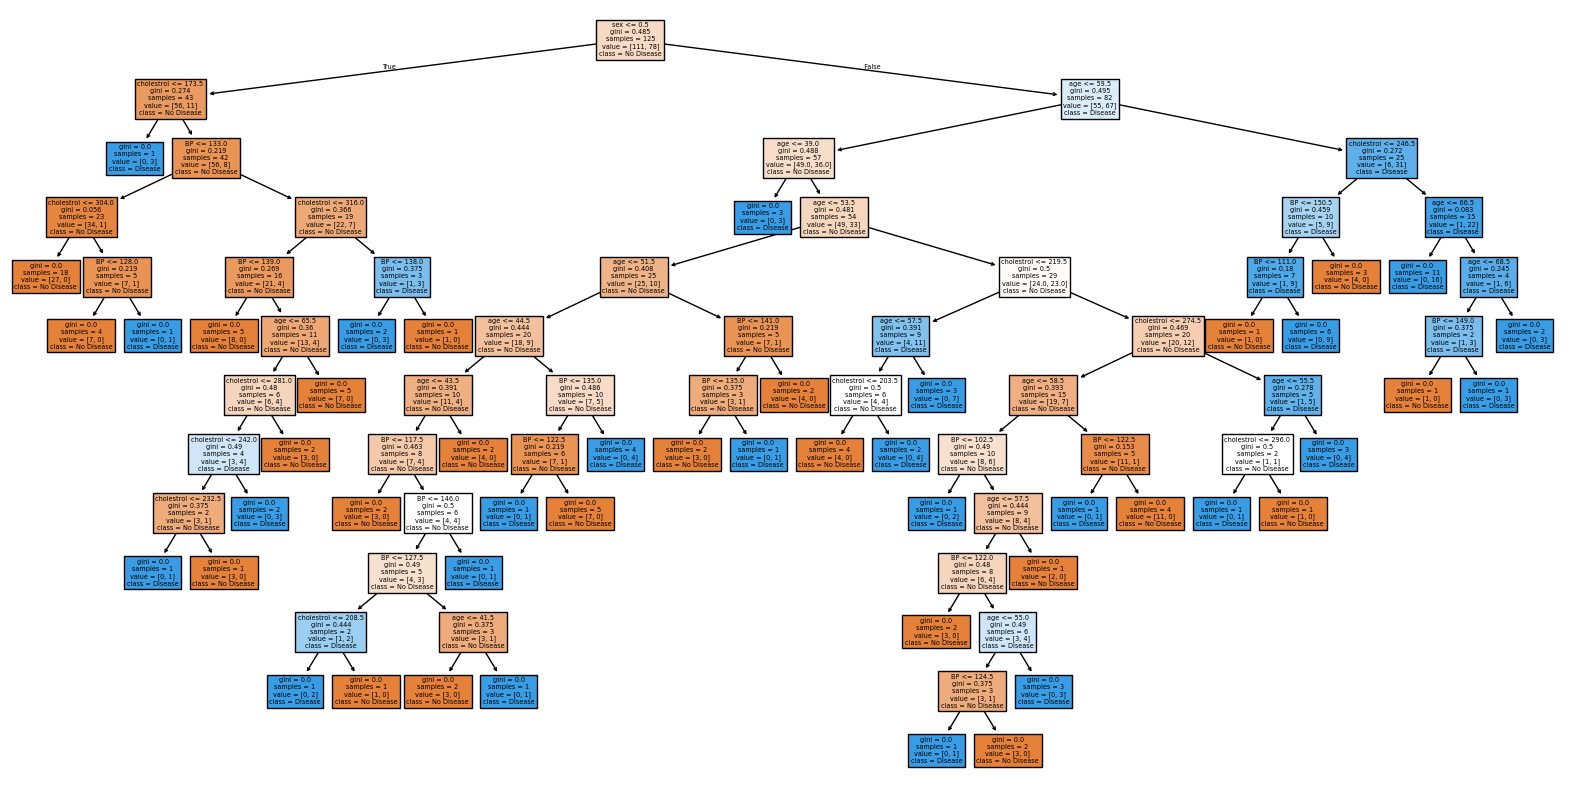

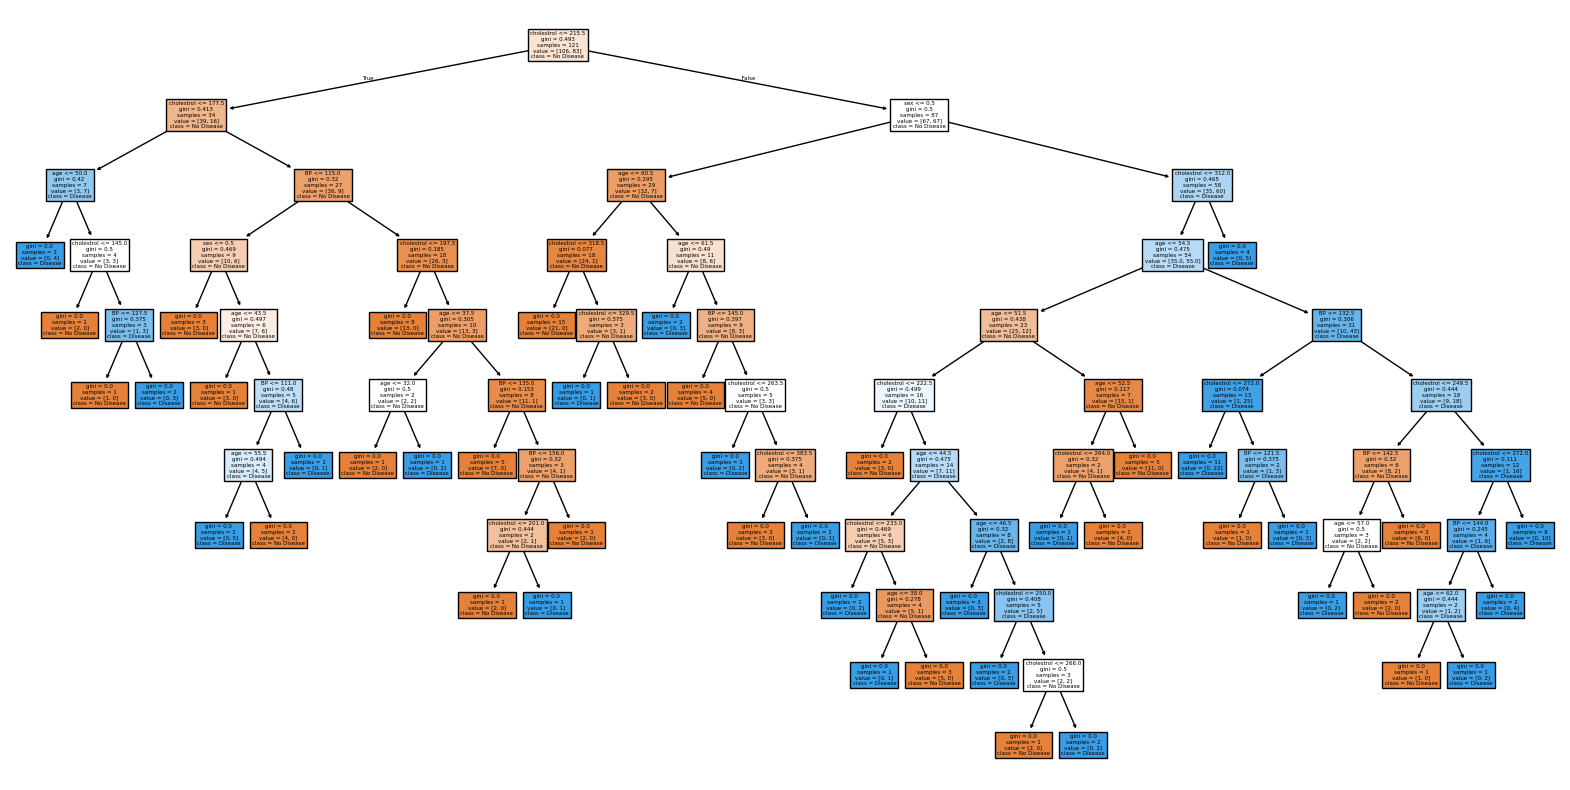

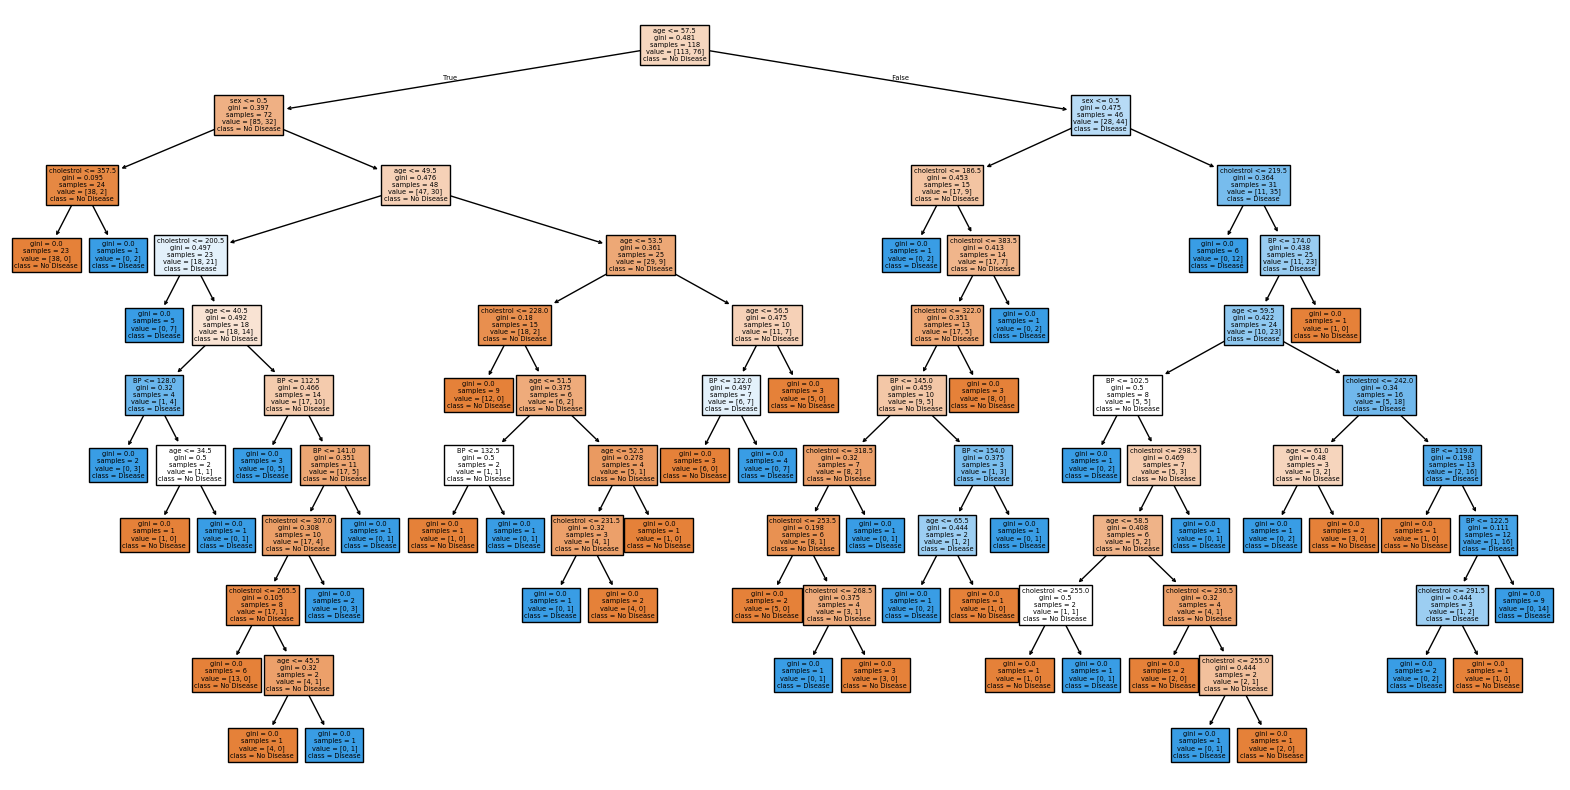

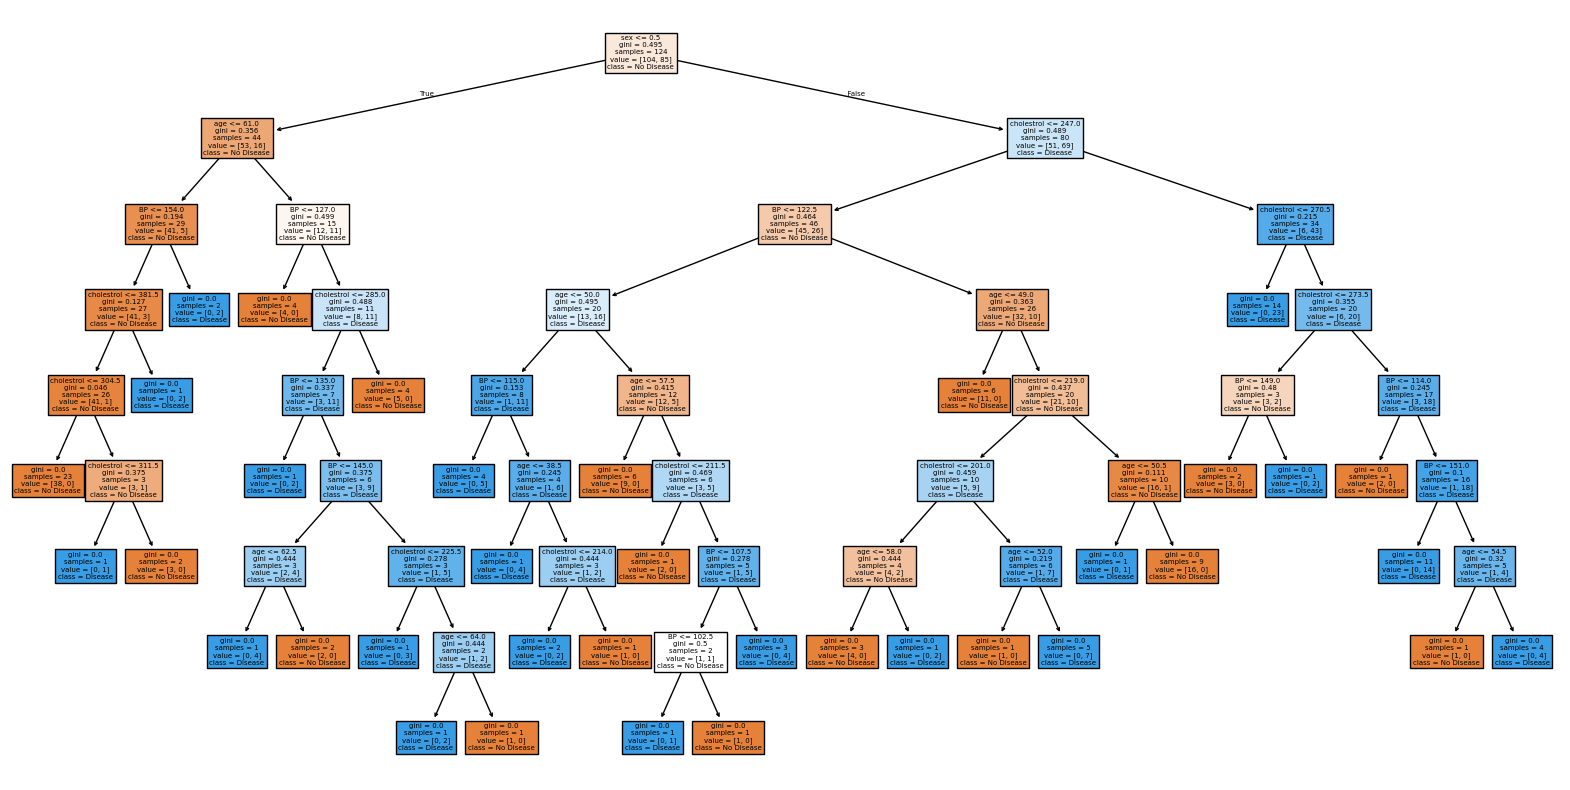

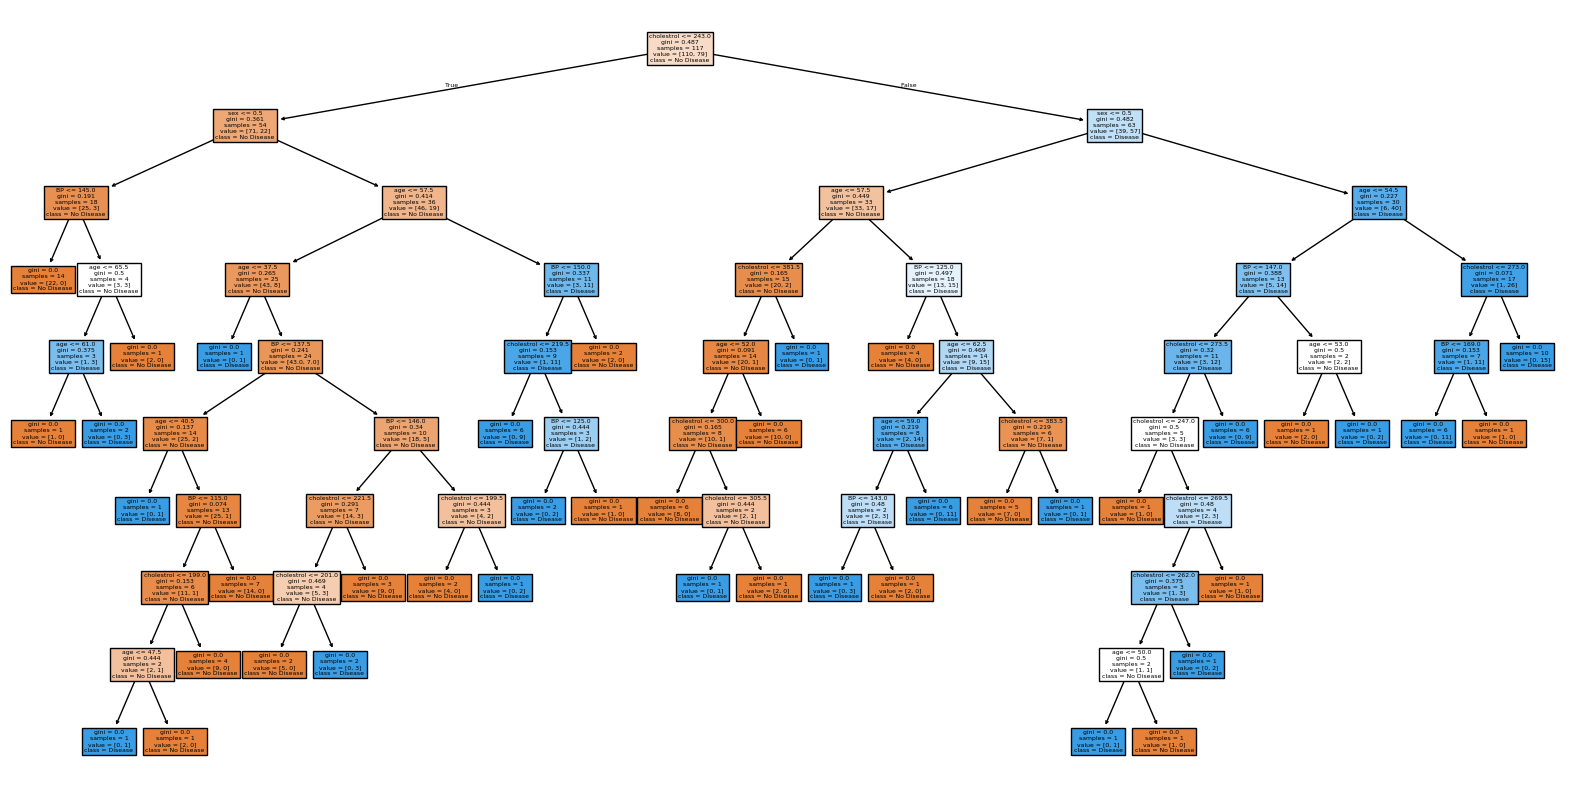

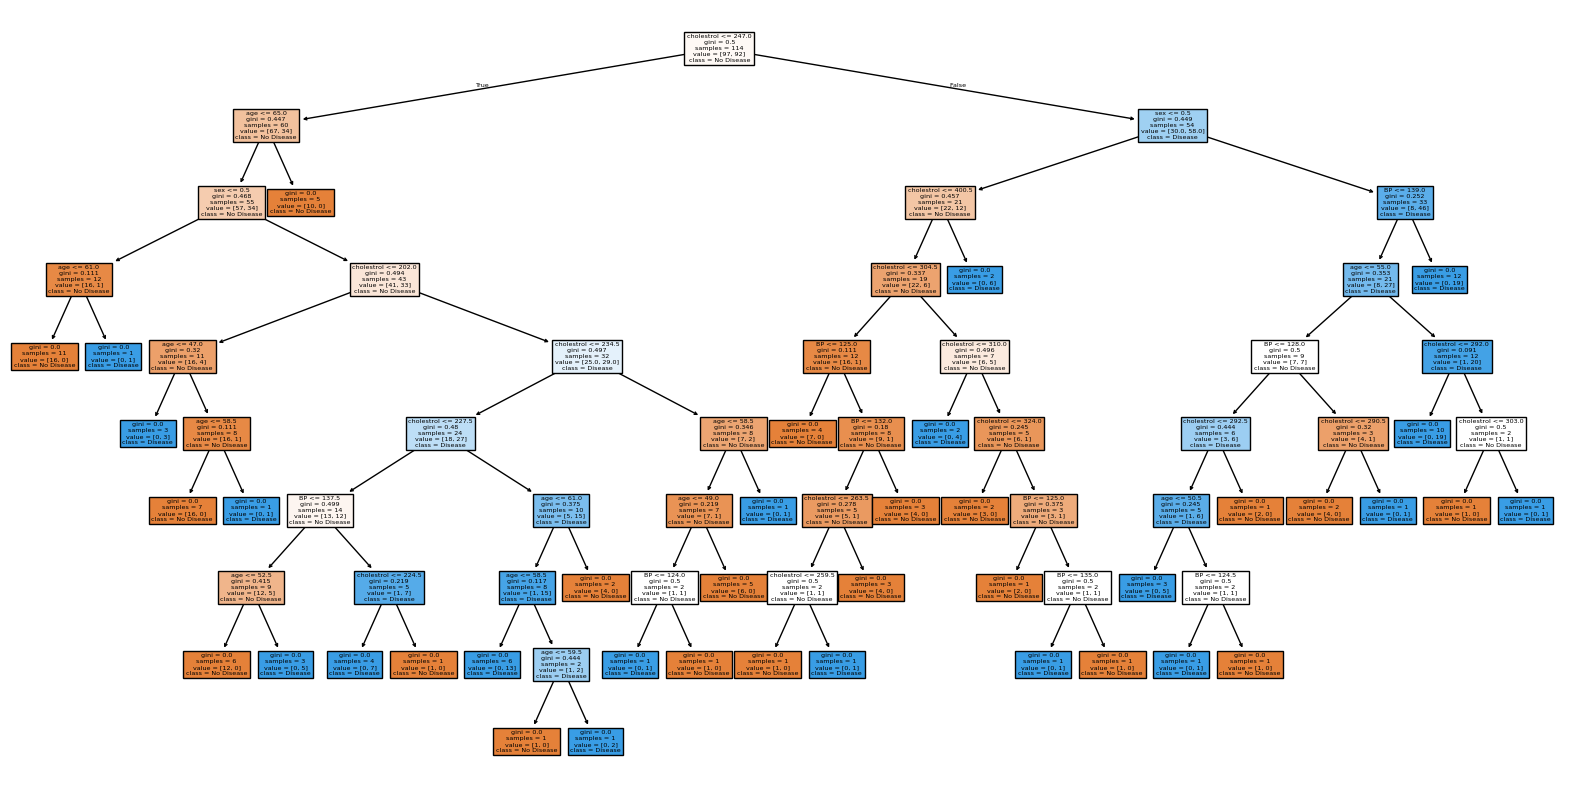

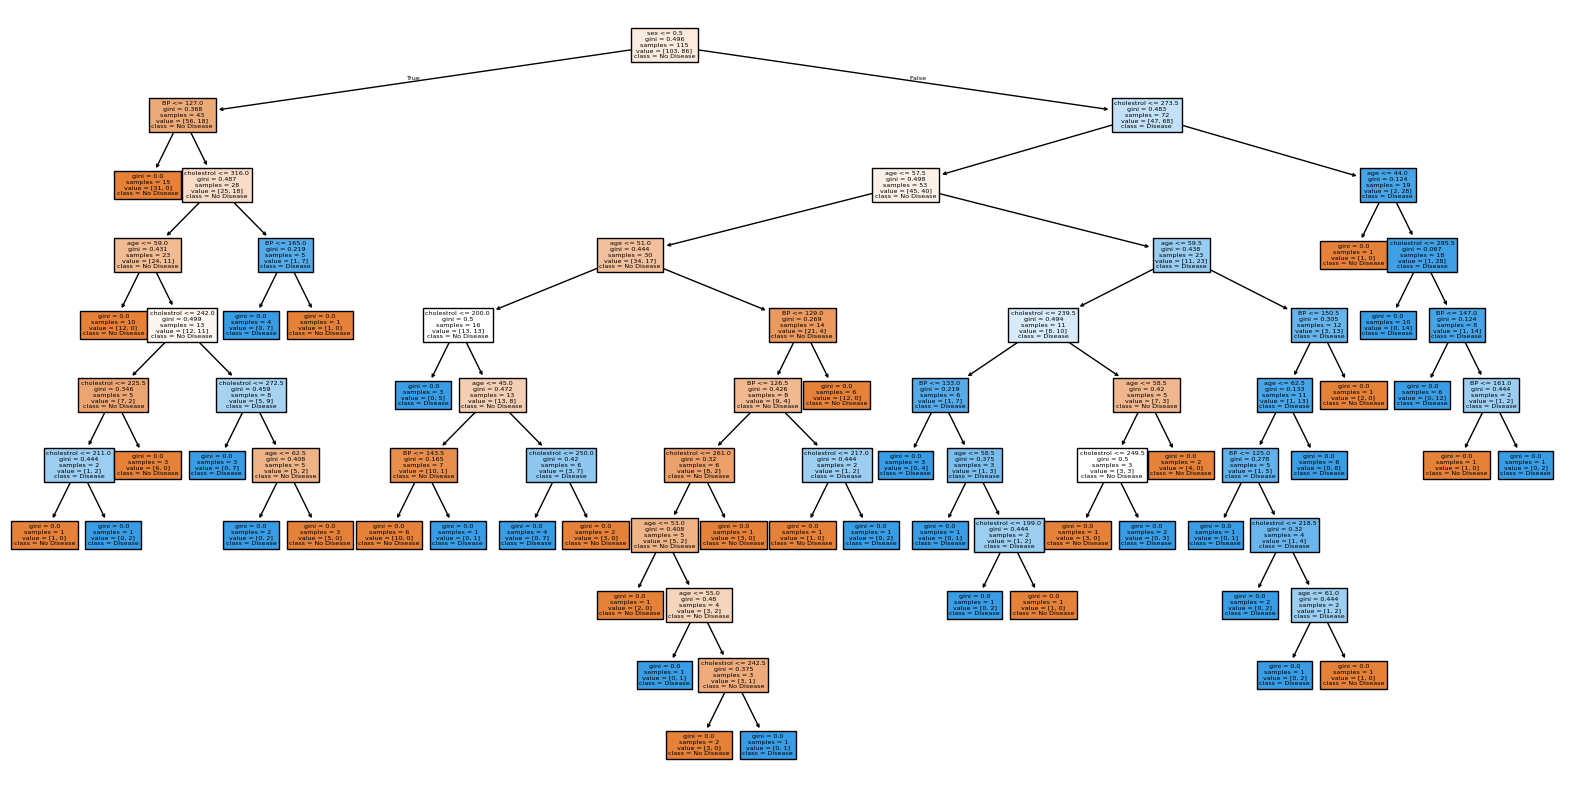

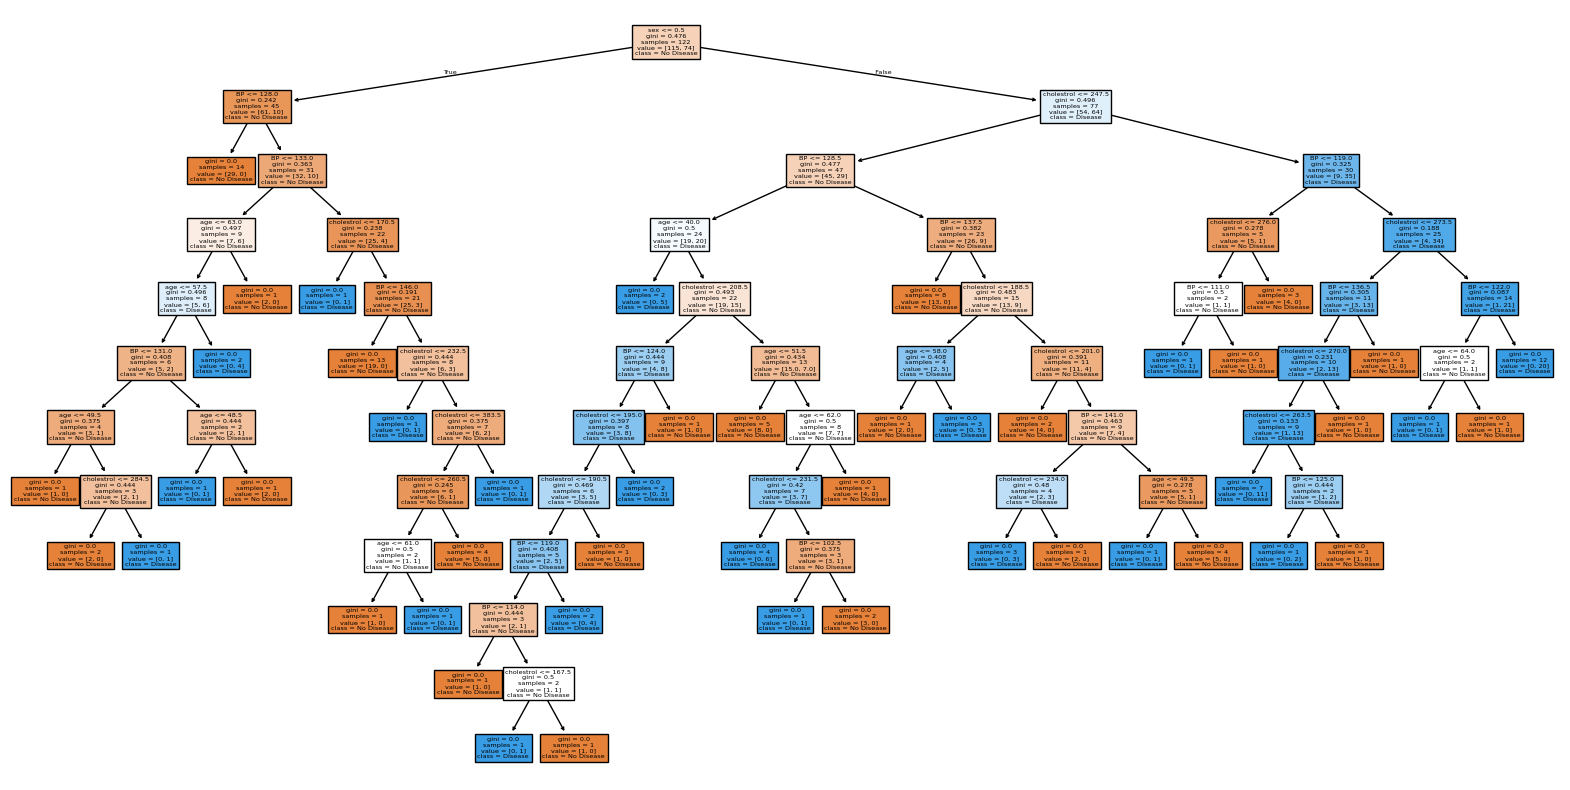

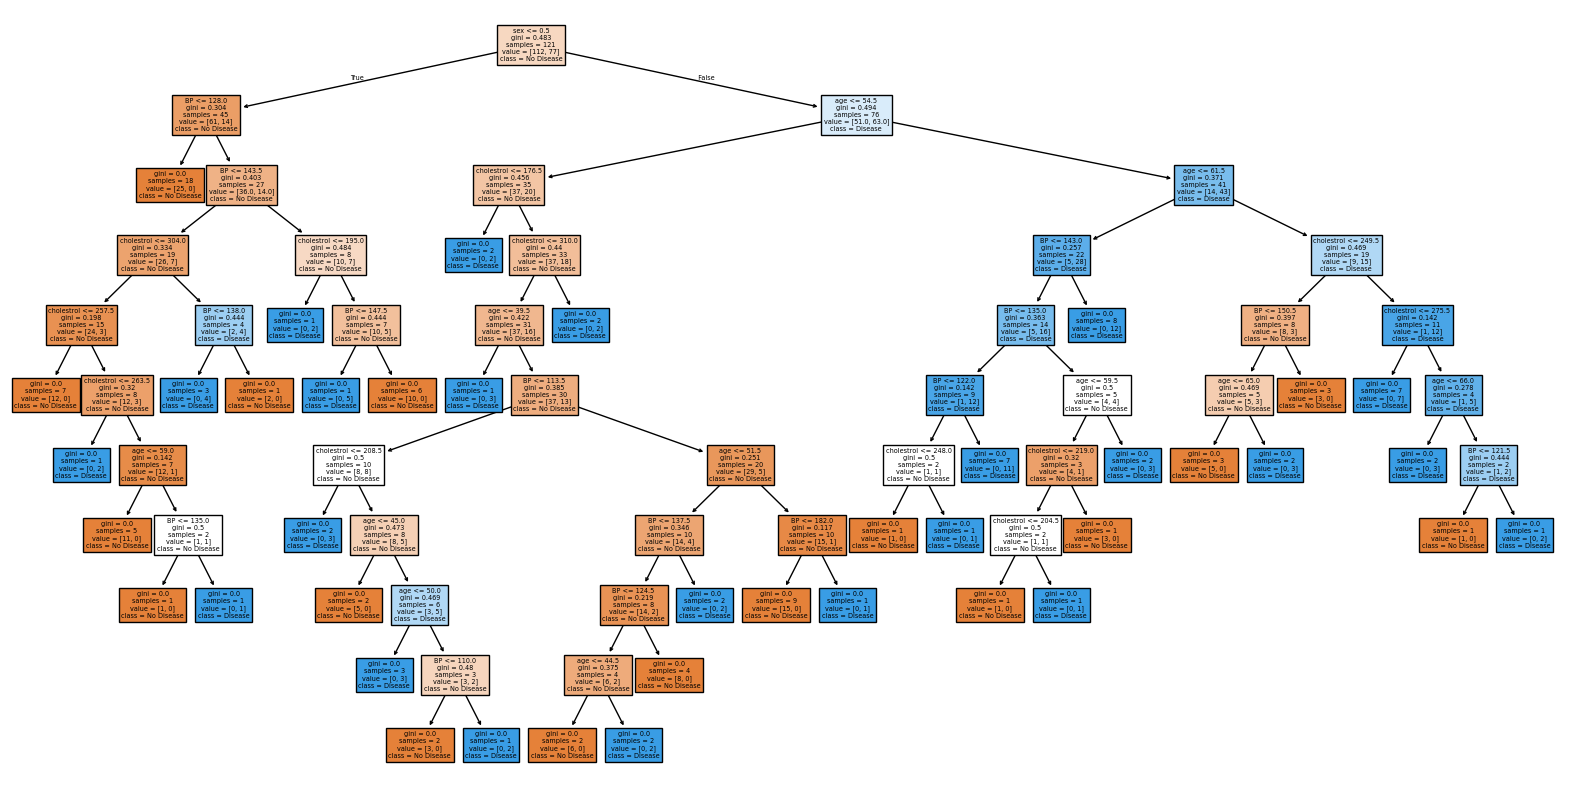

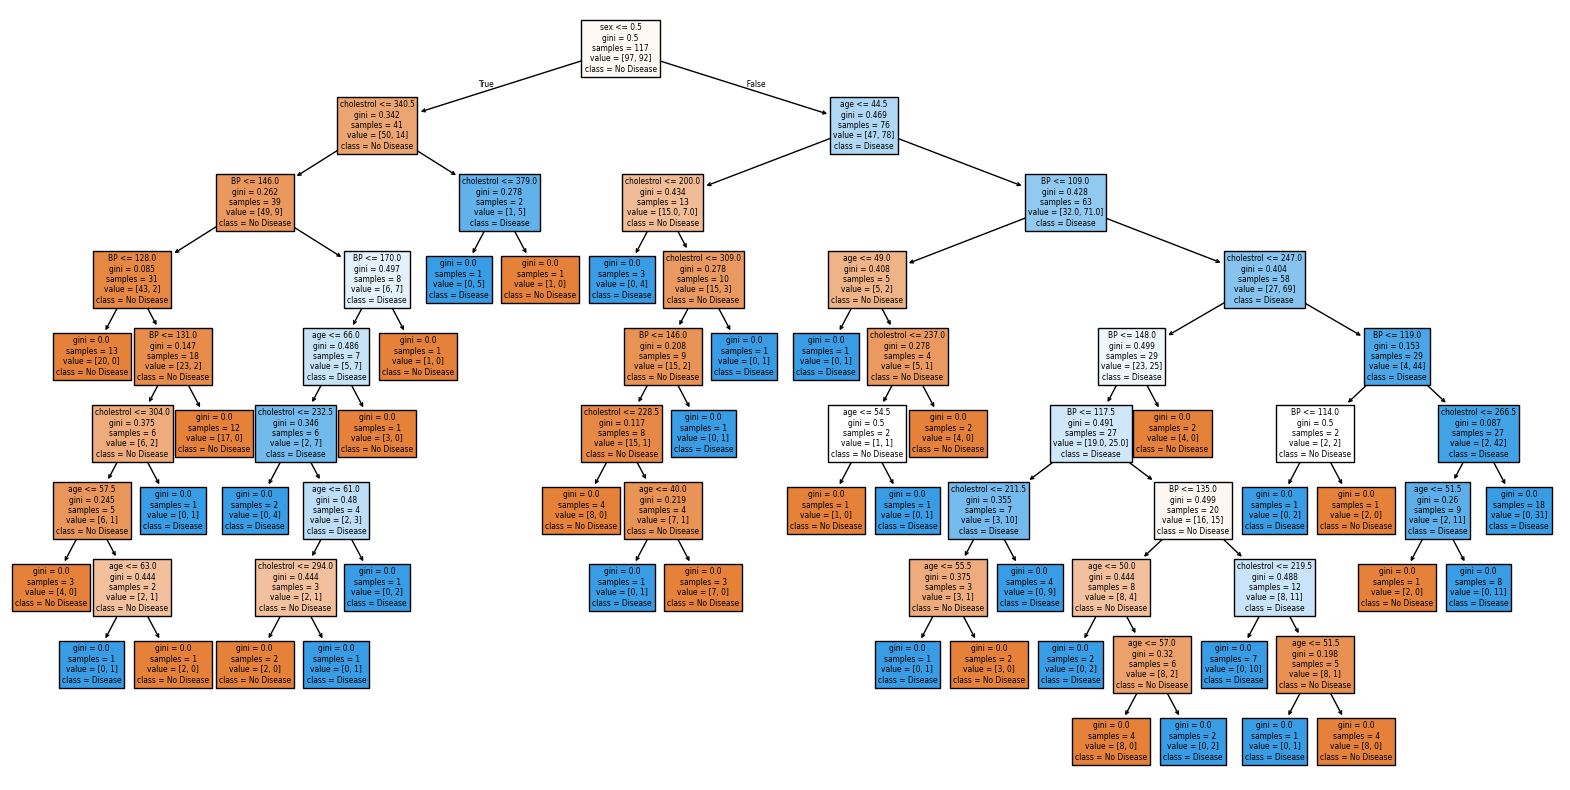

In [ ]:
for i in range(0,10):
  plt.figure(figsize=(20,10))
  plot_tree(rf_model_01.estimators_[i], feature_names = X.columns,class_names=["No Disease",'Disease'],filled=True);

#### Feature Importance in Random Forests

Variables with high importance are drivers of the outcome and their values have a significant impact on the outcome values. By contrast, variables with low importance might be omit

In [ ]:
importances = rf_model_01.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X.columns, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)
feature_imp_df

Feature  Gini Importance
3  cholestrol         0.350614
0         age         0.300942
2          BP         0.210228
1         sex         0.138216

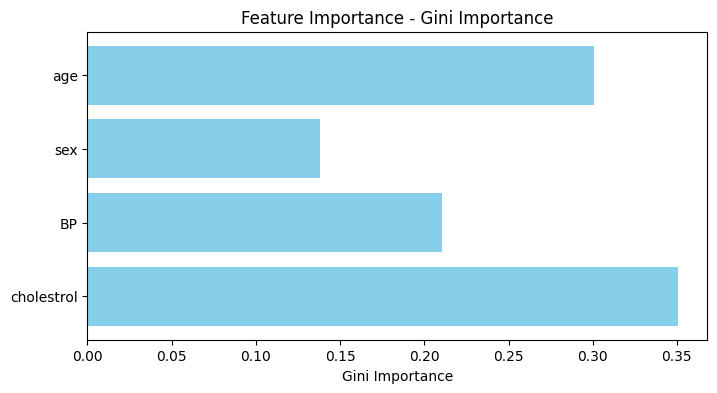

In [ ]:
plt.figure(figsize=(8, 4))
plt.barh(X.columns, importances, color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

By the above features we can observe which variables have the biggest influence on the target variable. So, in this case, we observe that `cholestrol` has the greatest influence

#### Evaluate the model

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred )

array([[27, 18],
       [18, 18]])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:",accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.5555555555555556

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.60      0.60        45
           1       0.50      0.50      0.50        36

    accuracy                           0.56        81
   macro avg       0.55      0.55      0.55        81
weighted avg       0.56      0.56      0.56        81



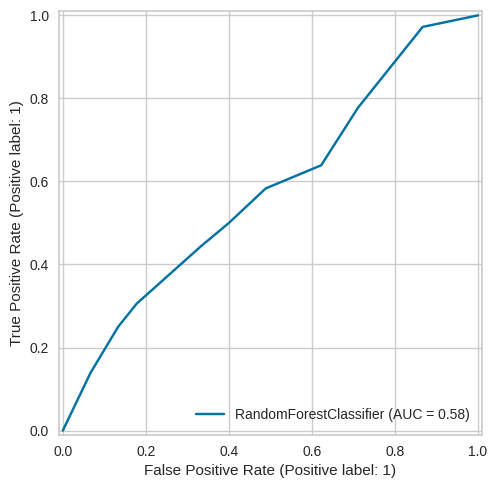

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(rf_model_01, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


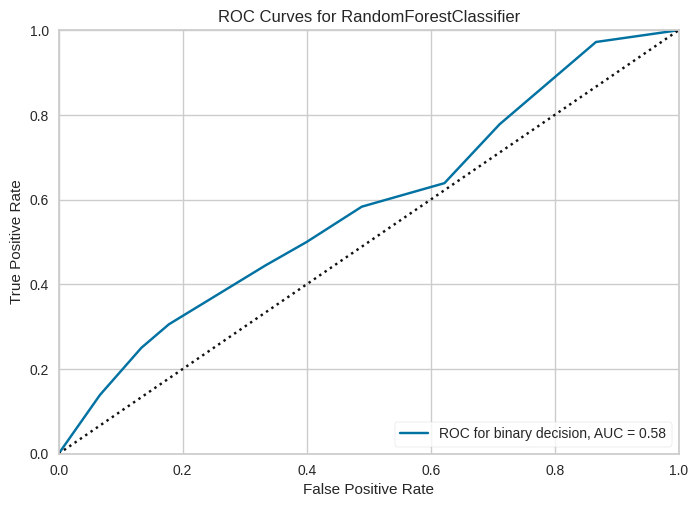

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
from yellowbrick.classifier import ROCAUC
vis = ROCAUC(rf_model_01, binary=True)

vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()

Having $0.58$ of `AUC` means that this is indeed a very poor model

Let's check if the model is over-fitted or under-fitted

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=rf_model_01,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

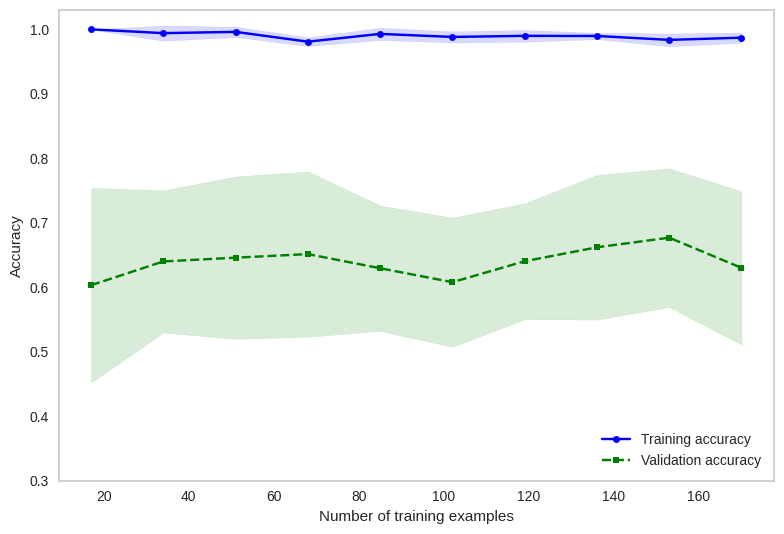

In [ ]:
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.3, 1.03])
plt.tight_layout()
plt.show()

The gap is huge, so we conclude it's an over-fitted model. We shall change something to create a better model. Let's explore the parameters of the model

In [ ]:
rf_model_01.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Usually we sample the square root (see `'max_features':'sqrt'`) of the number of all variables, i.e. when our dataset has, for example, 25 variables (25 columns), this means that we sample the subset which consists of 5 variable and from those 5 variables we sample 1. In our case, we have 4 variables, from which we sample 2 and among those we choose only one.

### Second Model

In [ ]:
rf_model_02 = RandomForestClassifier(random_state=42)
rf_model_02.fit(X_train,y_train)
y_pred = rf_model_02.predict(X_test)

In [ ]:
rf_model_02.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

We observe that `'n_estimators':100` so the model'll consist of 100 trees

In [ ]:
confusion_matrix(y_test, y_pred )

array([[30, 15],
       [16, 20]])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:",accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.6172839506172839

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.67      0.66        45
           1       0.57      0.56      0.56        36

    accuracy                           0.62        81
   macro avg       0.61      0.61      0.61        81
weighted avg       0.62      0.62      0.62        81



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


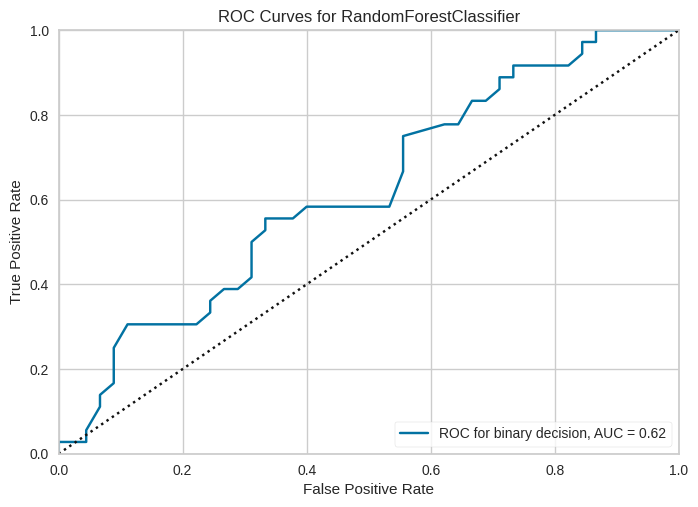

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
vis = ROCAUC(rf_model_02, binary=True)

vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()

This is a better model because `AUC` is a little bigger, but the curve is not wonderful (it still tends to the main diagonal and even crosses it). So this random forest is not perfect either.

### Hyperparameter Tuning

Using Scikit-Learn's RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with **each** combination of values.

We tune some of the hyperparameters as below.
* `max_depth` : the maximum level of each tree. A deeper tree is more overfitted. So, a high value makes the model fail to generalize.
* `n_estimators` : the number of trees in the forest.
* `max_features` : the number of features. This is one of the main hyperparameters that prevents overfitting. The square root of the total number of features is recommended.
* `min_samples_leaf` : the minimum number of samples required to be at the leaf node of each tree.


verbose - controls the verbosity: the higher, the more messages.

In [ ]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [1,3,5,10],
    'n_estimators': [10,50,100,200],
    'max_features': [1,2,3]
}

We will create 240 different combinations of models ($240 = 5\cdot4\cdot4\cdot3$, which are the lengths of possibilities of the parameters in `params`). This is why the next cell will take some time (around 3 minutes)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf_model_01,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, # means we are using all possible jobs in my computer
                           verbose=1, scoring="accuracy")
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=10, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'max_features': [1, 2, 3],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_ # accuracy is a little bit better

0.6773826458036984

In [ ]:
print(grid_search.score(X_train,y_train))
print(grid_search.score(X_test,y_test))

0.7248677248677249
0.6172839506172839


In [ ]:
grid_search.best_params_

{'max_depth': 2,
 'max_features': 3,
 'min_samples_leaf': 10,
 'n_estimators': 200}

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=2, max_features=3, min_samples_leaf=10,
                       n_estimators=200, random_state=42)

Basically, with this `Grid Search` we have managed to test different values for our parameters, being able to find the best parameters that define the best possible model. However, we must remember this is extremely time-consuming

Finally, let us check this best classifier

In [ ]:
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=rf_best,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=5,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

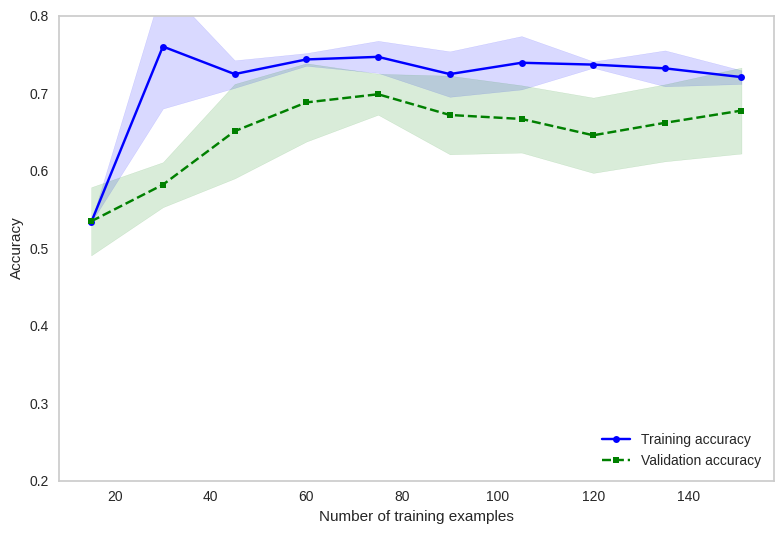

In [ ]:
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.2, 0.8])
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


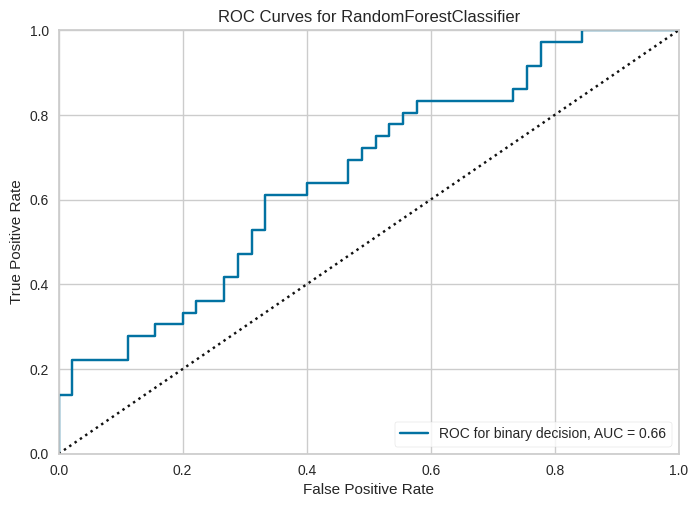

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
vis = ROCAUC(rf_best, binary=True)

vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()

Now, let's explore a different method, the `Random Search`

In [ ]:
from scipy.stats import randint

param_grid={'max_depth':[2,4],
            'n_estimators':np.arange(10, 500, step=50),
            'max_features':randint(1,3),
         }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator=rf_model_02, # it's better to put here this model02 because
                                                      # it was created with the default n_estimators (100)
                                                      # unlike model01, which had 10 trees (n_estimators=10)
                               param_distributions = param_grid,
                               scoring='accuracy',
                               n_jobs=-1, cv=5, verbose=2)
model_random = rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
model_random.best_params_

{'max_depth': 2, 'max_features': 2, 'n_estimators': 410}

In [ ]:
print(model_random.score(X_train,y_train))
print(model_random.score(X_test,y_test))

0.7195767195767195
0.6172839506172839


# Lesson 10 (22/01/2025)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving concrete.csv to concrete.csv


In [3]:
dataset = pd.read_csv('/content/concrete.csv')
dataset.head(5)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [4]:
dataset.describe()

cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.167864    73.895825    54.188350   181.567282      6.204660   
std     104.506364    86.279342    63.997004    21.354219      5.973841   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     192.375000     0.000000     0.000000   164.900000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.400000   
75%     350.000000   142.950000   118.300000   192.000000     10.200000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  
std      77.753954    80.175980    63.169912    16.705742  
min     801.000000   594.000000     1.000000     2.330000  
25%     932.000000   730.950000     7.000000    23.710000  
50%     968.000000   779.500000    28.000000    34.445000  
75%    1029.400000   824.000000    56.000000    46.135000  
max    1145.000000   992.600000   365.000000    82.600000

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df=scaler.fit(dataset).transform(dataset)
df

array([[0.08972603, 0.58987201, 0.        , ..., 0.38760662, 0.07417582,
        0.34334122],
       [0.15273973, 0.11741792, 0.62118941, ..., 0.50727546, 0.03571429,
        0.26385947],
       [0.33789954, 0.        , 0.47826087, ..., 0.67034621, 0.07417582,
        0.33499439],
       ...,
       [0.39817352, 0.32276016, 0.45127436, ..., 0.43728048, 0.07417582,
        0.52261119],
       [0.54794521, 0.10573178, 0.        , ..., 0.19066734, 0.73901099,
        0.65690794],
       [1.        , 0.        , 0.        , ..., 0.04766683, 0.01648352,
        0.62638595]])

In [8]:
X=dataset.drop(columns=['strength'])
y=dataset['strength']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

## Gradient Boosting Regressor

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor(n_estimators=500, max_depth=4, min_samples_split=2,
          learning_rate= 0.01, loss='squared_error')
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500)

In [12]:
y_pred = gbr.predict(X_test)

In [13]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8947353365926503

In [14]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test, y_pred)

5.534996044888639

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


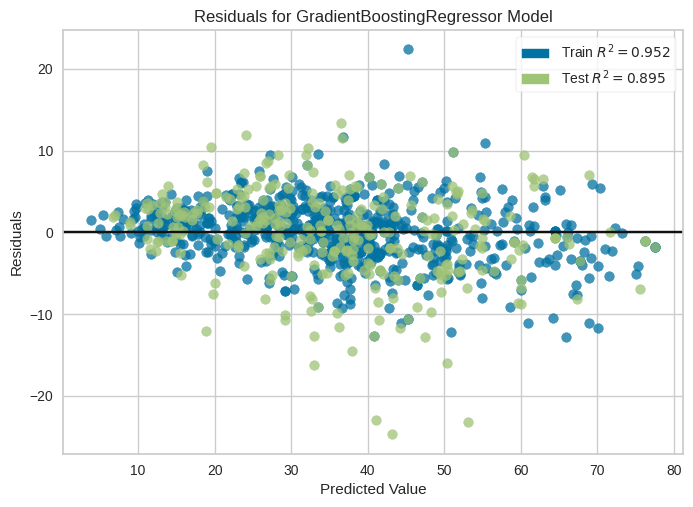

<Axes: title={'center': 'Residuals for GradientBoostingRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [15]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(gbr, hist=False)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


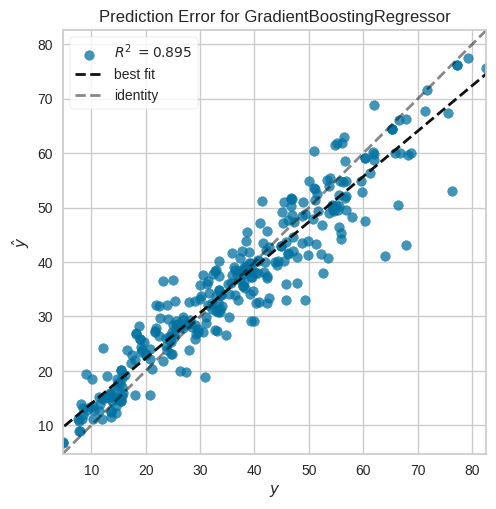

<Axes: title={'center': 'Prediction Error for GradientBoostingRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [16]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(gbr)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

## Neural Network

In [17]:
from sklearn.neural_network import MLPRegressor
net_01 = MLPRegressor(hidden_layer_sizes=(1),
                      random_state=4,
                      max_iter=2000)

In [18]:
net_01.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=1, max_iter=2000, random_state=4)

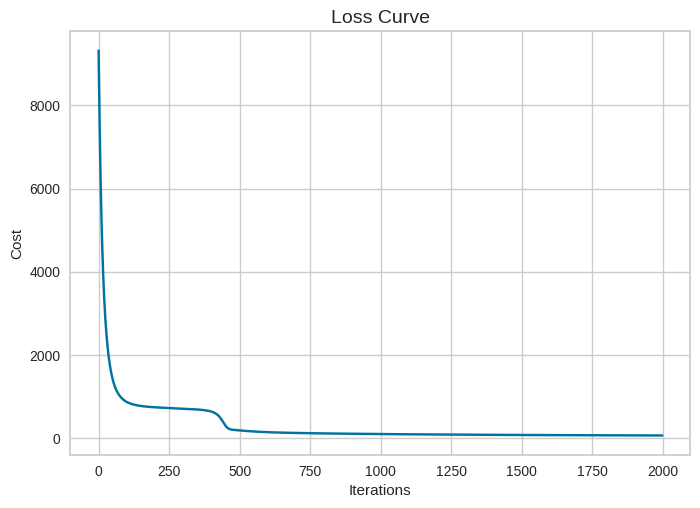

In [19]:
plt.plot(net_01.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [32]:
y_pred_01=net_01.predict(X_test)

In [34]:
test_set_rsquared = r2_score(y_test, y_pred_01)
test_set_rmse = root_mean_squared_error(y_test, y_pred_01)
print('R-squared value:', test_set_rsquared)
print('RMSE:', test_set_rmse)

R-squared value: 0.5318431062912929
RMSE: 11.672710734458661


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


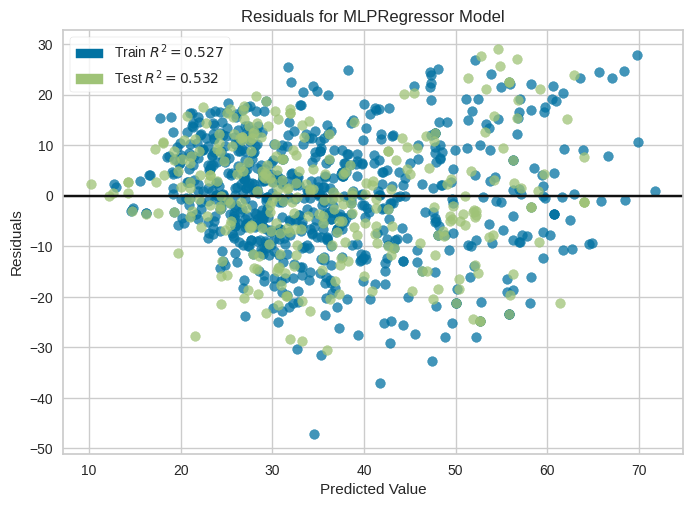

<Axes: title={'center': 'Residuals for MLPRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [22]:
visualizer = ResidualsPlot(net_01, hist=False)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


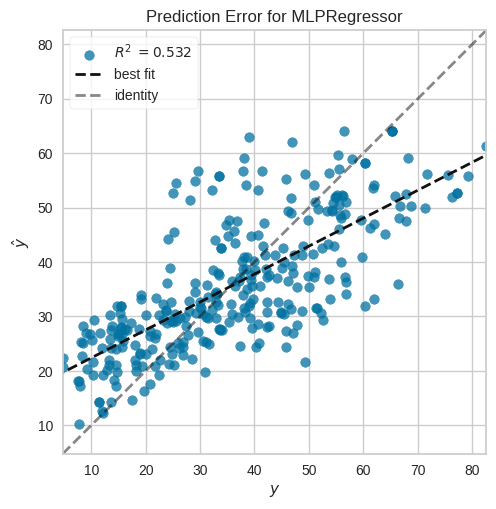

<Axes: title={'center': 'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [23]:
visualizer = PredictionError(net_01)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [24]:
net_01.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 1,
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 2000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 4,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [25]:
net_02 = MLPRegressor(hidden_layer_sizes=(8),
                      activation='logistic',
                         random_state=42,
                         max_iter=2000)

In [26]:
net_02.fit(X_train,y_train)
y_pred_02=net_02.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


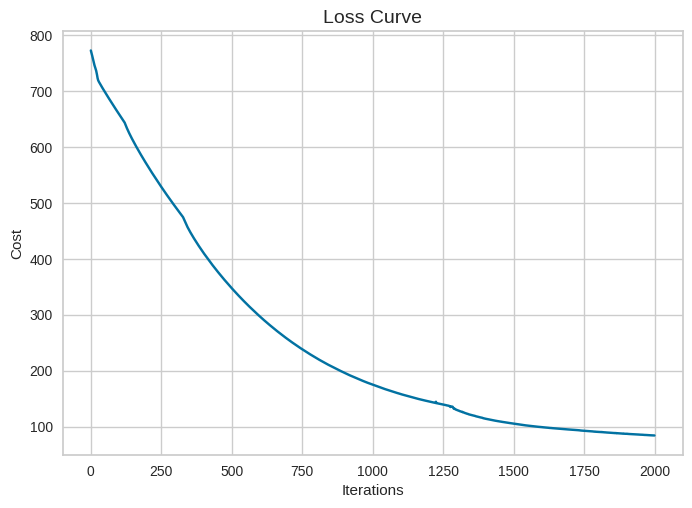

In [27]:
plt.plot(net_02.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [28]:
test_set_rsquared = net_02.score(X_test, y_test)
test_set_rmse = root_mean_squared_error(y_test, y_pred_02)

print('R_squared value: ', test_set_rsquared)
print('RMSE: ', test_set_rmse)

R_squared value:  0.3868299922441536
RMSE:  13.358769728258434


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


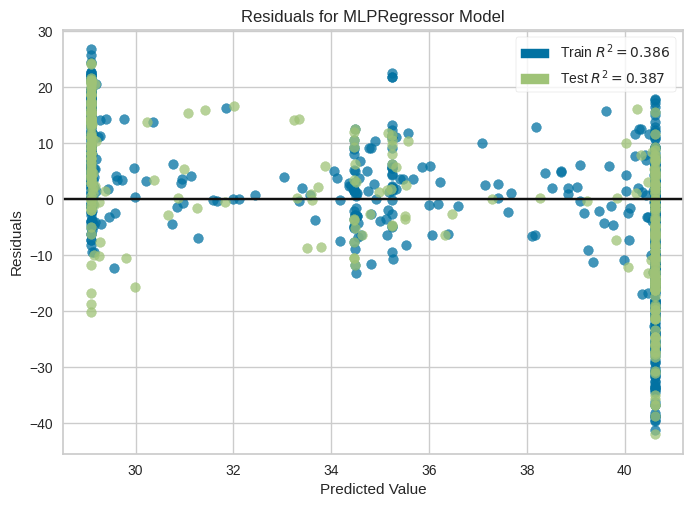

<Axes: title={'center': 'Residuals for MLPRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [29]:
visualizer = ResidualsPlot(net_02, hist=False)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


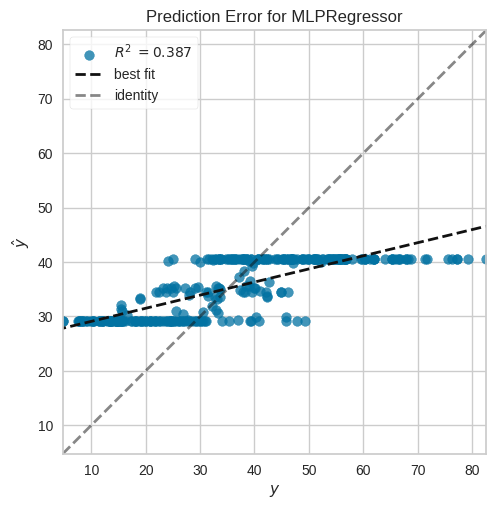

<Axes: title={'center': 'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [30]:
visualizer = PredictionError(net_02)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [35]:
param_list = {"hidden_layer_sizes": [(1,),(2,)], "activation": ["identity", "logistic", "tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"]}

In [36]:
param_list = {"hidden_layer_sizes": [(1),(2),(3),(8),(8,4)]}

In [37]:
from sklearn.model_selection import GridSearchCV
grid_net = GridSearchCV(estimator=net_01, param_grid=param_list, cv=5)
grid_net.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perce

GridSearchCV(cv=5,
             estimator=MLPRegressor(hidden_layer_sizes=1, max_iter=2000,
                                    random_state=4),
             param_grid={'hidden_layer_sizes': [1, 2, 3, 8, (8, 4)]})

In [38]:
grid_net.best_params_

{'hidden_layer_sizes': (8, 4)}

In [39]:
grid_net.score(X_test,y_test)

0.8229855218718406

In [40]:
param_list2 = {"hidden_layer_sizes": [(1),(2),(8,4)], 'max_iter': [200, 600, 1000]}

In [41]:
grid_net2 = GridSearchCV(estimator=net_01, param_grid=param_list2, cv=5)
grid_net2.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=5,
             estimator=MLPRegressor(hidden_layer_sizes=1, max_iter=2000,
                                    random_state=4),
             param_grid={'hidden_layer_sizes': [1, 2, (8, 4)],
                         'max_iter': [200, 600, 1000]})

In [42]:
grid_net2.best_params_

{'hidden_layer_sizes': (8, 4), 'max_iter': 1000}

In [43]:
grid_net2.score(X_test,y_test)

0.8250516937787717

In [44]:
param_list3 = {"hidden_layer_sizes": [(1),(2)], "activation": ["identity", "logistic", "tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"],'max_iter': [200, 1000, 2000]}

In [45]:
grid_net3 = GridSearchCV(estimator=net_01, param_grid=param_list3, cv=5)
grid_net3.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

GridSearchCV(cv=5,
             estimator=MLPRegressor(hidden_layer_sizes=1, max_iter=2000,
                                    random_state=4),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [1, 2],
                         'max_iter': [200, 1000, 2000],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [46]:
grid_net3.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 2,
 'max_iter': 200,
 'solver': 'lbfgs'}

In [47]:
grid_net3.score(X_test,y_test)

0.817738293944605

In [48]:
best=grid_net3.best_estimator_

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


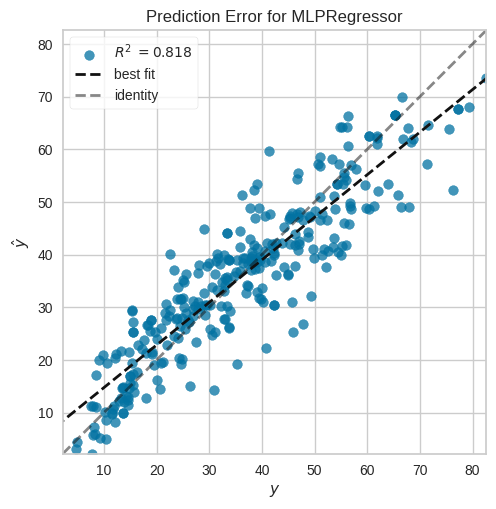

<Axes: title={'center': 'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [49]:
visualizer = PredictionError(best)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()